<a href="https://colab.research.google.com/github/CLAUDERNORONHA/FINACAS/blob/master/ACOES_AMAZON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python  para  Finanças



A base de dados você encontra https://www.nasdaq.com/market-activity/stocks/amzn/historical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
amzn = pd.read_csv('/content/drive/My Drive/MERCADO - AÇÕES/dados-valores.csv')

In [ ]:
amzn.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/24/2020,$3008.91,5632413,$2930,$3031.58,$2888
1,07/23/2020,$2986.55,5656906,$3098.2713,$3098.2713,$2970
2,07/22/2020,$3099.91,4104225,$3125,$3149.9999,$3065.26
3,07/21/2020,$3138.29,6134965,$3232.49,$3240.5758,$3105.72
4,07/20/2020,$3196.84,7598176,$3000.2,$3201.3599,$2994.0172


In [ ]:
amzn.shape

(20, 6)

In [ ]:
amzn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20 non-null     object
 1    Close/Last  20 non-null     object
 2    Volume      20 non-null     int64 
 3    Open        20 non-null     object
 4    High        20 non-null     object
 5    Low         20 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.1+ KB


## Método da cauda


Outro método útil que chamaremos é o método da cauda. Ele exibe as últimas cinco linhas do quadro de dados. Digamos que se você deseja ver as últimas três linhas, pode inserir o valor 3 como um número inteiro entre parênteses.

In [ ]:
amzn.tail()

,Date,Close/Last,Volume,Open,High,Low
15,07/02/2020,$2890.3,6593387,$2912.01,$2955.56,$2871.1021
16,07/01/2020,$2878.7,6363439,$2757.99,$2895,$2754
17,06/30/2020,$2758.82,3769686,$2685.065,$2769.63,$2675.03
18,06/29/2020,$2680.38,4223422,$2690.01,$2696.8,$2630.08
19,06/26/2020,$2692.87,6500784,$2775.056,$2782.5688,$2688


In [ ]:
amzn.describe()

,Volume
count,2.000000e+01
mean,5.876231e+06
std,1.120582e+06
min,3.769686e+06
25%,5.202544e+06
50%,5.961920e+06
75%,6.523935e+06
max,7.720420e+06


Por que estamos apenas obtendo valores para a coluna Volume e não para outras colunas? Aí vem o que chamamos de preparação de dados. Limpar dados e prepará-los para análise é um passo importante. Há algumas coisas que precisamos cuidar antes de seguirmos para as próximas etapas. 

#Limpeza de dados


Mencionamos anteriormente que o método de descrição funciona especificamente com valores numéricos, isso significa que a coluna Volume foi o único valor numérico em nosso quadro de dados. Vamos verificar os tipos de dados de nossas colunas.

In [ ]:
amzn.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

Bom, agora podemos converter os tipos de dados. Não precisamos alterar nada nas colunas Data e Volume. Converteremos as colunas restantes em um valor numérico. Para este exercício, podemos usar o tipo numérico float.

In [ ]:
#Vamos renomear o nome das colunas e convertendo os tipos de dados 

In [ ]:
dados = amzn

dados.columns = ['Data','Fechar','Volume','Abrir','Alto','Baixo']

In [ ]:
dados.head()

,Data,Fechar,Volume,Abrir,Alto,Baixo
0,07/24/2020,$3008.91,5632413,$2930,$3031.58,$2888
1,07/23/2020,$2986.55,5656906,$3098.2713,$3098.2713,$2970
2,07/22/2020,$3099.91,4104225,$3125,$3149.9999,$3065.26
3,07/21/2020,$3138.29,6134965,$3232.49,$3240.5758,$3105.72
4,07/20/2020,$3196.84,7598176,$3000.2,$3201.3599,$2994.0172


Como você pode ver acima, a coluna Volume é o único tipo inteiro e o restante é um tipo de objeto. Portanto, temos que cuidar dos tipos de dados. Porém, antes de convertê-los, limpamos o cifrão, caso contrário, nosso programa ficará confuso ao tentar converter o cifrão em um valor numérico.

In [ ]:
#Tirar os caractres  da base de dados

dados['Fechar'] = dados['Fechar'].apply(lambda x: str(x).replace("$"," "))

dados['Abrir'] = dados['Abrir'].apply(lambda x: str(x).replace("$", " "))

dados['Alto'] = dados['Alto'].apply(lambda x: str(x).replace("$", " "))

dados['Baixo'] = dados['Baixo'].apply(lambda x: str(x).replace("$", " "))

dados.head()

,Data,Fechar,Volume,Abrir,Alto,Baixo
0,07/24/2020,3008.91,5632413,2930,3031.58,2888
1,07/23/2020,2986.55,5656906,3098.2713,3098.2713,2970
2,07/22/2020,3099.91,4104225,3125,3149.9999,3065.26
3,07/21/2020,3138.29,6134965,3232.49,3240.5758,3105.72
4,07/20/2020,3196.84,7598176,3000.2,3201.3599,2994.0172


Agora vamos transformar os dados em folat é int

In [ ]:
dados = dados.astype({"Fechar":float, "Volume":int, "Abrir":float, "Alto":float, "Baixo": float})

In [ ]:
#Vamos conferir se teve a mudança.
dados.dtypes

Data       object
Fechar    float64
Volume      int64
Abrir     float64
Alto      float64
Baixo     float64
dtype: object

Ótimo, resolvemos o problema do tipo de dados. Agora, vamos tentar executar o método de descrição e ver como ele funciona.

In [ ]:
dados.describe()

,Fechar,Volume,Abrir,Alto,Baixo
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,3000.560500,5.876231e+06,2996.516115,3053.482280,2932.079560
std,154.253819,1.120582e+06,167.470527,166.222577,145.069514
min,2680.380000,3.769686e+06,2685.065000,2696.800000,2630.080000
25%,2944.052500,5.202544e+06,2925.502500,3006.890000,2883.775525
50%,3008.890000,5.961920e+06,3015.805000,3076.760000,2960.000000
75%,3100.932500,6.523935e+06,3102.700975,3160.969900,3025.637575
max,3200.000000,7.720420e+06,3251.060000,3344.290000,3135.700000


Bem feito! Agora, como você pode ver acima, o método de descrição funcionou perfeitamente com todas as nossas colunas numéricas. Também podemos personalizar nossos resultados para o método de descrição usando parâmetros diferentes. A descrição tem três parâmetros que usaremos neste exemplo: include, percentiles e exclude.

In [ ]:
dados.describe(include='float').T

,count,mean,std,min,25%,50%,75%,max
Fechar,20.0,3000.560500,154.253819,2680.380,2944.052500,3008.890,3100.932500,3200.00
Abrir,20.0,2996.516115,167.470527,2685.065,2925.502500,3015.805,3102.700975,3251.06
Alto,20.0,3053.482280,166.222577,2696.800,3006.890000,3076.760,3160.969900,3344.29
Baixo,20.0,2932.079560,145.069514,2630.080,2883.775525,2960.000,3025.637575,3135.70


In [ ]:
dados.describe(include='object')

,Data
count,20
unique,20
top,06/30/2020
freq,1


In [ ]:
dados.describe(exclude='int')

,Data,Fechar,Abrir,Alto,Baixo
count,20,20.000000,20.000000,20.000000,20.000000
unique,20,NaN,NaN,NaN,NaN
top,06/30/2020,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,3000.560500,2996.516115,3053.482280,2932.079560
std,NaN,154.253819,167.470527,166.222577,145.069514
min,NaN,2680.380000,2685.065000,2696.800000,2630.080000
25%,NaN,2944.052500,2925.502500,3006.890000,2883.775525
50%,NaN,3008.890000,3015.805000,3076.760000,2960.000000
75%,NaN,3100.932500,3102.700975,3160.969900,3025.637575


In [ ]:
dados.describe(percentiles=[0.1, 0.5, 0.9])

,Fechar,Volume,Abrir,Alto,Baixo
count,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,3000.560500,5.876231e+06,2996.516115,3053.482280,2932.079560
std,154.253819,1.120582e+06,167.470527,166.222577,145.069514
min,2680.380000,3.769686e+06,2685.065000,2696.800000,2630.080000
10%,2752.225000,4.211502e+06,2751.192000,2781.274920,2686.703000
50%,3008.890000,5.961920e+06,3015.805000,3076.760000,2960.000000
90%,3184.051000,7.268557e+06,3195.833000,3217.557580,3077.173440
max,3200.000000,7.720420e+06,3251.060000,3344.290000,3135.700000


Filtrando os dados

Operadores de comparação

* <
* >
* <=
* > =
* ==
* ! =


Usaremos esses operadores para comparar um valor específico com os valores da coluna. O resultado será uma série de booleanos: True e Falses. Verdadeiro se a comparação estiver correta, falso se a comparação não estiver correta.


> Mascaramento pelo preço de fechamento

Quando passamos uma série booleana para um quadro de dados usando o operador loc [], um novo quadro de dados será retornado contendo apenas os valores True.

In [ ]:
#Preço de fechamento mais de 300

mask_closeprice = dados.Fechar > 300
high_price = dados.loc[mask_closeprice]

high_price.head()

,Data,Fechar,Volume,Abrir,Alto,Baixo
0,07/24/2020,3008.91,5632413,2930.0000,3031.5800,2888.0000
1,07/23/2020,2986.55,5656906,3098.2713,3098.2713,2970.0000
2,07/22/2020,3099.91,4104225,3125.0000,3149.9999,3065.2600
3,07/21/2020,3138.29,6134965,3232.4900,3240.5758,3105.7200
4,07/20/2020,3196.84,7598176,3000.2000,3201.3599,2994.0172


**Visualização** de dados bold text


Visualizar os dados é uma etapa importante para entender os dados. Isso nos ajuda a ver mais do que apenas linhas de valores, fornece uma imagem melhor dos dados. Também é útil quando queremos fazer comparações entre diferentes valores de dados.




Visualizar os dados também é uma ótima maneira de entender e ver os relacionamentos entre diferentes colunas.

>Matplotib

A biblioteca de plotagem 2D mais usada é chamada Matplotlib. Esta biblioteca é muito poderosa, também possui uma curva de aprendizado. Com a ajuda dessa curva de aprendizado, outras bibliotecas foram construídas em torno dessa biblioteca.


Vamos traçar os preços das ações no último mês. Nosso eixo x será a data e o eixo y será o preço de fechamento de cada dia. Isso nos mostrará como o preço das ações muda durante o período de um mês. Falando do ponto de vista comercial, esse gráfico de linha é chamado de gráfico de flutuação de preços, o que ajuda a detectar padrões sazonais no preço das ações.

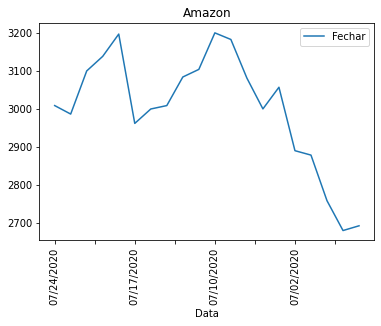

In [ ]:
dados.plot(x='Data', y='Fechar', rot=90).set_title('Amazon')
plt.show()

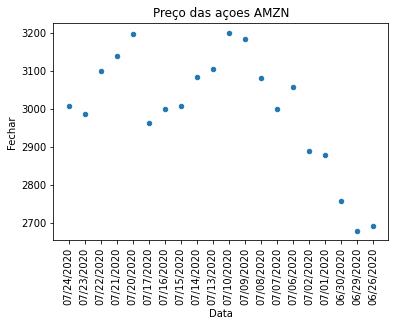

In [ ]:
dados.plot(x='Data', y='Fechar', kind='scatter', rot=90, title='Preço das açoes AMZN')
plt.show()

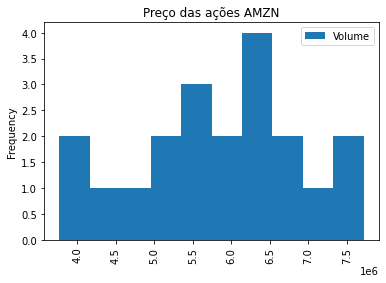

In [ ]:
dados.plot(x='Data', y='Volume',kind='hist',rot=90, title='Preço das ações AMZN')

plt.show()

Clauder Noronha